<a href="https://colab.research.google.com/github/Sana-Jawed/Data-Cleaning-by-Pandas-and-Pyspan/blob/main/Final_project_sana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTEBOOK BY SANA JAWED
**Key Insights of flight dataset**

Age of Members:

Most frequent flyers are between 35-45 years old.
Fewer older customers fly regularly, which could be a missed opportunity.

Frequent Flyer Program Levels:

Most customers are in the basic tier (Tier 4), while only a few are in the top tiers (Tier 5 & 6), showing the highest loyalty.

Flight History:

Data on first and last flights can help track customer patterns, like when they join or stop flying.

Outliers:

Some customers stand out with much higher flight activity and should be targeted with special deals.

**Business Improvement Suggestions**

Target Customers Aged 35-45:

 Create special offers for this age group, as they make up the majority of frequent flyers.

Increase Loyalty: Encourage Tier 4 customers to fly more by offering incentives to move up to higher tiers.

Retain Top Flyers: Offer exclusive perks to keep high-tier members flying regularly.

Fix Data Issues: Address missing or unusual data to improve accuracy.
Reduce Customer Churn: Create offers for customers who have stopped flying to bring them back.

Using these insights can help improve customer loyalty, grow sales, and retain more frequent flyers.

In [ ]:

import pandas as pd
!pip install pyspan
import pyspan as ps
import matplotlib.pyplot as plt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.1 MB/s eta 0:00:00


In [ ]:
path= '/content/flight.csv'
df = pd.read_csv(path)
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


**Data cleaning by Pandas**

**Dataset Dimensions and Structure**

*   contains 62,988 rows and 23 columns


In [ ]:
df.shape


(62988, 23)

In [ ]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.describe()

,MEMBER_NO,FFP_DATE,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,58065.000000,58065,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000,58065.000000
mean,31553.778438,2010-04-06 21:03:21.064324608,41.786016,11.981090,10952.378007,5345.068296,5646.352580,17189.824783,174.219685,67.398643,165.901145,0.325032,0.719861,12627.790786,2.827039
min,3.000000,2004-11-01 00:00:00,16.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15802.000000,2008-05-16 00:00:00,35.000000,3.000000,2541.000000,1016.000000,800.000000,4781.000000,29.000000,23.300000,79.000000,0.000000,0.611384,2804.000000,0.000000
50%,31633.000000,2010-11-20 00:00:00,41.000000,7.000000,5730.000000,2837.000000,2813.000000,10083.000000,106.000000,44.466667,143.000000,0.000000,0.711155,6390.000000,0.000000
75%,47307.000000,2012-04-11 00:00:00,48.000000,15.000000,12870.000000,6520.000000,6890.000000,21361.000000,264.000000,81.500000,227.000000,0.000000,0.808222,14404.000000,1.000000
max,62988.000000,2013-03-31 00:00:00,67.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000
std,18188.997482,NaN,9.104802,14.201532,16189.667098,8040.852126,8683.543372,20885.356719,182.904537,77.191595,123.036313,1.142344,0.183423,20516.013269,7.512926


In [ ]:
len(df.columns)

23

**Dropping Columns**

*MEMBER_NO : column is an identifier and does not add meaningful value for analysis.

*LOAD_TIME: If it only indicates the observation window end date and doesn’t contribute to analysis


In [ ]:
df=ps.handle_nulls(df, columns='MEMBER_NO', action='remove', inplace=False)


In [ ]:
df =ps. detect_outliers(df, method='iqr', threshold=1.5,columns='AGE'  )

Total number of outliers detected across columns: 998
Original data shape: (62988, 23)
Data shape after removing outliers: (61570, 23)


**Checking nulls**

The dataset contains several columns with missing values



In [ ]:
pd.set_option("display.max_row",None)
df.isnull().sum()

,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,3
FFP_TIER,0
WORK_CITY,2112
WORK_PROVINCE,3017
WORK_COUNTRY,25
AGE,0
LOAD_TIME,0


In [ ]:
#Total numbers of nulls in dataset
df.isnull().sum().sum()

5835

In [ ]:
#percentage of null values
6655/62988*100

10.565504540547407

**Work Country Distribution**

*   CN: 92% (the majority of entries)

*   Other countries: 8% (combined)


In [ ]:
df["WORK_COUNTRY"].unique()

array(['CN', 'US', 'FR', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA', 'KR',
       'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO', 'GN',
       'FL', 'KH', nan, 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT', 'EC',
       'NG', 'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'NI', 'KO', 'AN', 'CC',
       'UV', 'MN', 'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT',
       'NO', 'MS', 'FI', 'UZ', 'NE', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA',
       '中', 'ES', 'MZ', 'IR', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ', 'UA',
       'LB', 'YE', 'GE', 'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB', 'CD',
       'UY', 'CM', 'TK', 'AR', 'BN', 'PN', 'BD', '北', 'SU', 'RU', '沈',
       'GB', 'ZW', 'PP', '芬', 'FO', 'IE', 'PR', 'BS', 'GH', 'SK', 'IA',
       'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

** Data cleaning steps by Pyspan**

**Handling Columns with High Missing Values**


In our dataset, several columns contain a significant percentage of missing values. Handling these missing values is crucial for ensuring the quality of our analysis. Columns with a high percentage of missing data that cannot be meaningfully imputed may need to be dropped.

**Columns with High Missing Values**
* WORK_CITY has Missing Values: 2,269
* WORK_PROVINCE has Missing Values: 3,248
  
**Decision to Drop Columns**
Both columns have a noticeable amount of missing data. we recommend dropping these columns from the dataset to maintain the integrity and accuracy of our analysis.


In [ ]:
# Removing nulls by removing nulls from  column  WORK_CITY
df=ps. handle_nulls(df, columns='WORK_CITY', action='remove', inplace=False)


In [ ]:
#Removing nulls by removing nulls from column  WORK_PROVINCE
df=ps. handle_nulls(df, columns='WORK_PROVINCE', action='remove', inplace=False)

**Null Values in the Gender Column**

* Total Entries: 63,000
* Missing Values: 3
* We can fill these missing entries in the  with the mode of the column.
   

In [ ]:
df=ps. handle_nulls(df, columns='GENDER', action='impute', by='mode', inplace=False)

**Handling nulls in the Age Column**
* 323 missing values

* fill it with median of column




---




In [ ]:
df=ps. handle_nulls(df, columns='AGE', action='impute', by='median', inplace=False)

Handling nulls Values in SUM_YR_1 and SUM_YR_2

*   528 for SUM_YR_1
*   134 for SUM_YR_2`
*   To fill find the mean of the column




In [ ]:
df = ps. handle_nulls(df, columns='SUM_YR_1', action='impute', by='mean', inplace=False)


In [ ]:
df = ps. handle_nulls(df, columns='SUM_YR_2', action='impute', by='mean', inplace=False)


Handling null Value in WORK_COUNTRY

*   It has 1 missing value
*   To fill we use mode of country.

In [ ]:
df =ps. handle_nulls(df, columns='WORK_COUNTRY', action='replace', with_val='CN')

**DETECT OUTLIERS**




In [ ]:
df['AGE'].head()

,AGE
0,31.0
2,40.0
3,64.0
4,48.0
5,64.0


In [ ]:
df['AGE'] = df['AGE'].round().astype(int)


In [ ]:
df['AGE'].value_counts()

,count
AGE,
38,2587
47,2574
37,2568
42,2495
39,2473
40,2422
41,2337
36,2242
46,2187


In [ ]:
df =ps. detect_outliers(df, method='iqr', threshold=1.5,columns='AGE'  )

Total number of outliers detected across columns: 0
Original data shape: (58065, 23)
Data shape after removing outliers: (58065, 23)


**Gender Distribution**

Graph Type: Bar Plot

Purpose: To show the number of members by gender.

In [ ]:
member_breakdown= df['GENDER'].value_counts()


In [ ]:
bar_xaxis=member_breakdown.index

In [ ]:
bar_yaxis=member_breakdown.values

Text(0.5, 0, 'Gender')

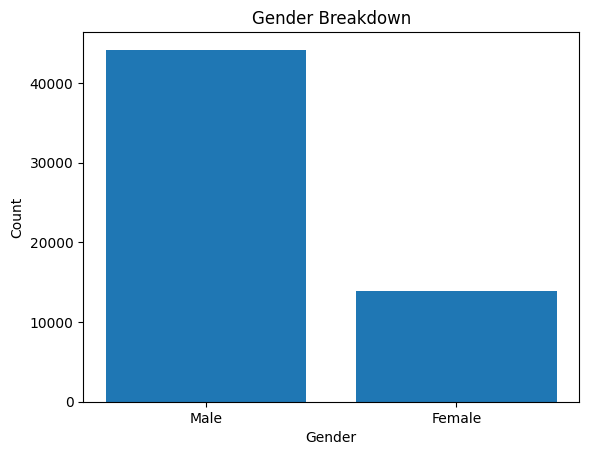

In [ ]:
plt.bar(bar_xaxis ,bar_yaxis)
plt.title('Gender Breakdown')
plt.ylabel('Count')
plt.xlabel('Gender')

**Flight Count vs. Points Sum**

Graph Type: Scatter Plot

Purpose: To see the correlation between flight count and total points accumulated.

Text(0.5, 0, 'Points Sum')

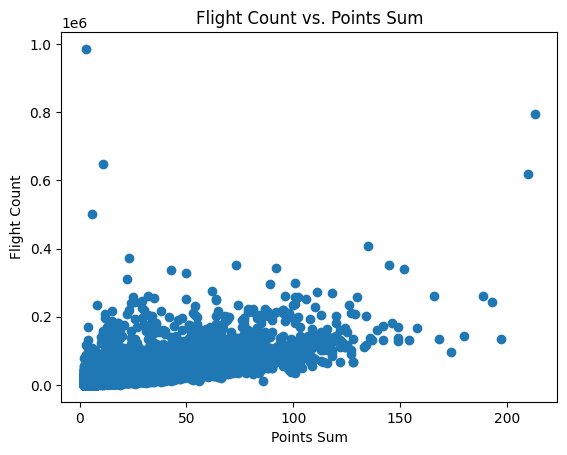

In [ ]:
plt.scatter(df['FLIGHT_COUNT'], df['Points_Sum'])
plt.title('Flight Count vs. Points Sum')
plt.ylabel('Flight Count')
plt.xlabel('Points Sum')

**Top Country for Work**

Graph Type: Bar Plot


Purpose: To see the top countries where members work.

Text(0.5, 0, 'Gender')

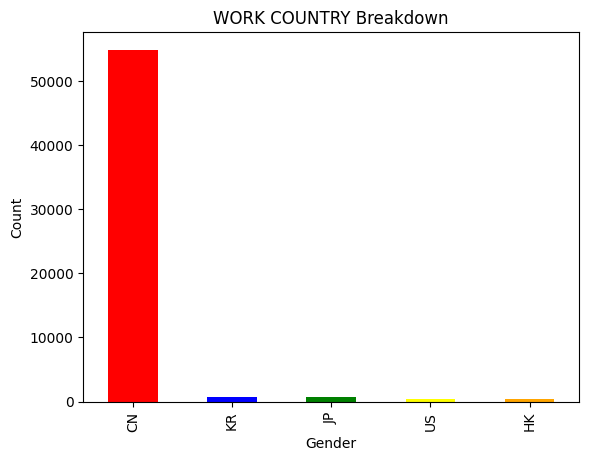

In [ ]:
df["WORK_COUNTRY"].value_counts().head().plot(kind='bar', color=['red','blue','green','yellow','orange'])
plt.title('WORK COUNTRY Breakdown')
plt.ylabel('Count')
plt.xlabel('Gender')


**Membership Tier Distribution**

Graph Type: Pie Chart

Purpose: To display the proportion of members in different frequent flyer program tiers.



In [ ]:
df['FFP_TIER'].replace({4: 'Medium Tier', 5: 'High Tier', 6: 'Highest Tier'}, inplace=True)

<ipython-input-31-cb52c8aed24c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FFP_TIER'].replace({4: 'Medium Tier', 5: 'High Tier', 6: 'Highest Tier'}, inplace=True)


<Axes: ylabel='count'>

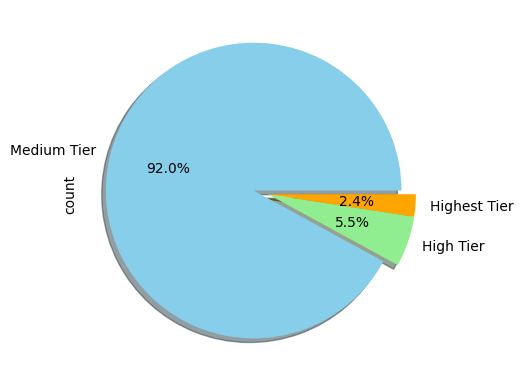

In [ ]:
df['FFP_TIER'].value_counts().plot(kind='pie', autopct='%1.1f%%' ,shadow=True ,explode = [0.1, 0, 0] ,colors=['skyblue', 'lightgreen', 'orange', 'yellow'])

***Age Distribution***:

Graph Type: Histogram

Purpose: To visualize the distribution of ages in the dataset.


Text(0.5, 0, 'AGE')

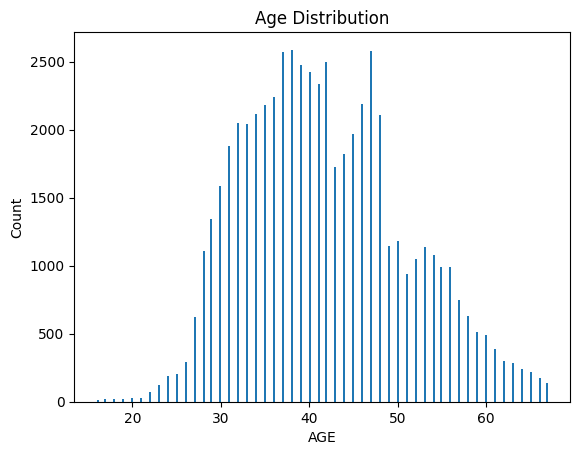

In [ ]:
plt.hist(df['AGE'], bins=200)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('AGE')

FLIGHT_COUNT:
* Number of flights taken by each customer




Text(0.5, 0, ' customer')

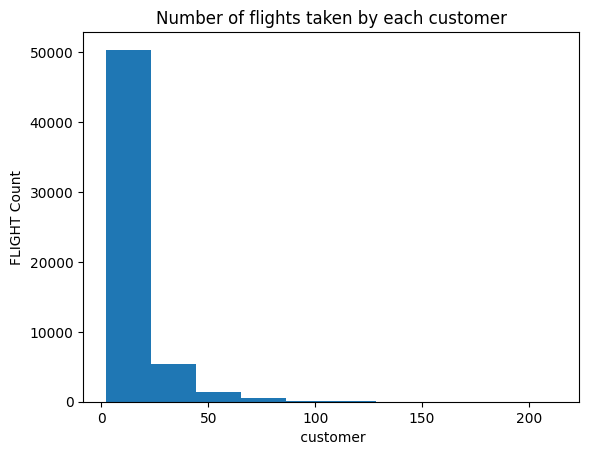

In [ ]:
plt.hist(df['FLIGHT_COUNT'], bins=10)
plt.title('Number of flights taken by each customer')
plt.ylabel('FLIGHT Count')
plt.xlabel(' customer')

GENDER vs. Points_Sum

Use a bar plot to compare the total points earned by gender.

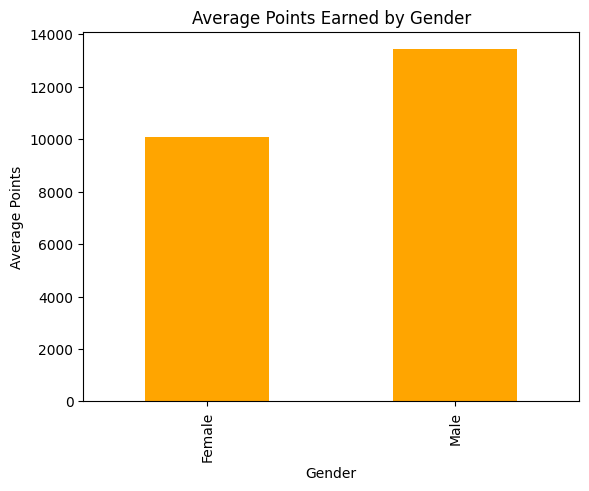

In [ ]:
df.groupby('GENDER')['Points_Sum'].mean().plot(kind='bar', color='orange')
plt.title('Average Points Earned by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Points')
plt.show()


TIME SERIES ANALYSIS

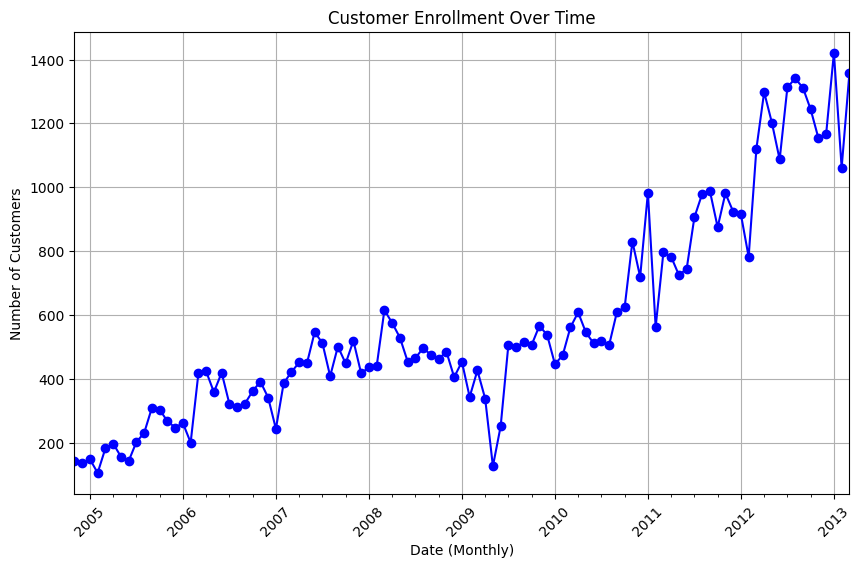

In [ ]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])

# Create a time series plot by grouping data by date and counting records
time_series_data = df.groupby(df['FFP_DATE'].dt.to_period("M")).size()

# Plot the time series
plt.figure(figsize=(10,6))
time_series_data.plot(kind='line', color='blue', marker='o')

plt.title('Customer Enrollment Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Conclusion**

The analysis of the frequent flyer dataset reveals key opportunities for improving customer engagement and loyalty. The largest customer segment is between 35-45 years old, suggesting a potential focus for targeted marketing. Most customers remain in the basic tier, highlighting an opportunity to increase loyalty and move them to higher tiers with appropriate incentives.

By addressing data issues and leveraging insights about flight patterns and customer behavior, the business can better retain high-tier customers, reduce churn, and attract inactive customers back with personalized offers. These steps can ultimately drive higher revenue and customer satisfaction.








 **How I used chatgpt for this project**

In this project, I used ChatGPT to find a suitable airline customer dataset, gain insights into customer behavior, and clarify unclear data column definitions. It provided guidance on handling null values and managing imbalanced data, which was essential for accurate analysis. ChatGPT also helped me explore the potential benefits of my analysis and graph suggestions for customer segmentation. By refining my prompts iteratively, I ensured more precise responses, helping me achieve the desired results throughout the project.